# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

import warnings

warnings.filterwarnings("ignore")

# Fix random seed for reproducibility
np.random.seed(42)

# we start by importing @JMDuarte's helper functions
import sys
import os
from IPython.display import Image

module_path = os.path.abspath("dep/")
sys.path.append(module_path)

from sgd_multiopt_helper import*
from sgd_helper import *

# Data Loading

In [27]:
# from JMDuarte
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    Input:
        filename: given as a string.
    Output:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

# 1) Previous Work 

During the bachlor (a looong time ago :D) we did [a project](https://github.com/diodeamy/ComputationalMethods/blob/main/Project%204/FINAL_project.ipynb) that used machine learning. Bare in mind that the time constraints of the coruse were such that we did not actually write the code, only attempted to apply it.

# 2) TesnorFlow Playground

## Problem A

The data is **not linear**, so with an activation function that is linear you could never achieve a non-linear fit. The test loss is around 0.5

Adding the $X^1 X^2$ allows us to classify the data properly. The test loss is around 0.1.I suppose it's because this is a non-linear input type?

Adding hidden layers will not help, because they are still linear operations. The Activation layer needs to be changed to a non-linear one for this to work.

**The training loss of 0** and **the test loss of 0.001**)

[Link](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=xor&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.45450&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Here is the image ![title](img/pA.jpg)

## Problem B

### all options

I tried to add as little a possible and chose tanh (trigonometric) activation because I figured the shape is spiral and that would fit. With only 3 hidden layers with 8, 6 and 2 neurons on each layer respectively. The **test loss is 0.005** and the **training loss is 0.006**. 

[Link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,6,2&seed=0.29327&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false) 

Here is the image ![title](img/pB.png)

### only $X^1$ and $X^2$

With only these types of inputs, also trying to keep the resources used at a minimum, I believe I was able to get a reasonable fit (3 hidden layers with 8, 7, and 4 neurons each respectively) with **test loss of 0.079** and **training loss of 0.008**.

[Link](https://playground.tensorflow.org/#activation=tanh&batchSize=9&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,7,4&seed=0.68578&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

![title](img/pB2.png)

With one extra layer of 2 neurons and adding one extra neuron on the now previous to last layer, the fit stabilises much faster and is better with **training loss of 0** and **test loss of 0.015** 

[Link](https://playground.tensorflow.org/#activation=tanh&batchSize=9&dataset=spiral&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,7,5,2&seed=0.68578&showTestData=false&discretize=true&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

![title](img/pB3.png)

# 3) Bias-Variance Tradeoof

## Problem C

In [24]:
data = load_data("../A1/data/bv_data.csv")
x = data[:, 0]
y = data[:, 1]

In [25]:
d = np.array([1, 2, 6, 12])
N = np.array(range(20, 101, 5))
num_folds = 5

In [26]:
kf = KFold(n_splits=num_folds)

results_dict = {}

for Ns in N.tolist():
    
    for degree in d:
        kf1 = kf.split(x[:Ns])
        train_errors = []
        test_errors = []

        for train_index, test_index in kf1:
            
            coefficients = np.polyfit(x[train_index], y[train_index], int(degree))
            
            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]
    
            y_train_pred = np.polyval(coefficients, x_train)
            train_err = mean_squared_error(y_train, y_train_pred)
            train_errors.append(train_err)
    
            y_test_pred = np.polyval(coefficients, x_test)
            test_err = mean_squared_error(y_test, y_test_pred)
            test_errors.append(test_err)
        
        
        train_error_avg = np.average(train_errors)    
        test_errors_avg = np.average(test_errors)
            
        results_dict[(Ns,degree)] = {"train_error": train_error_avg, 
                                   "test_error": test_errors_avg} 


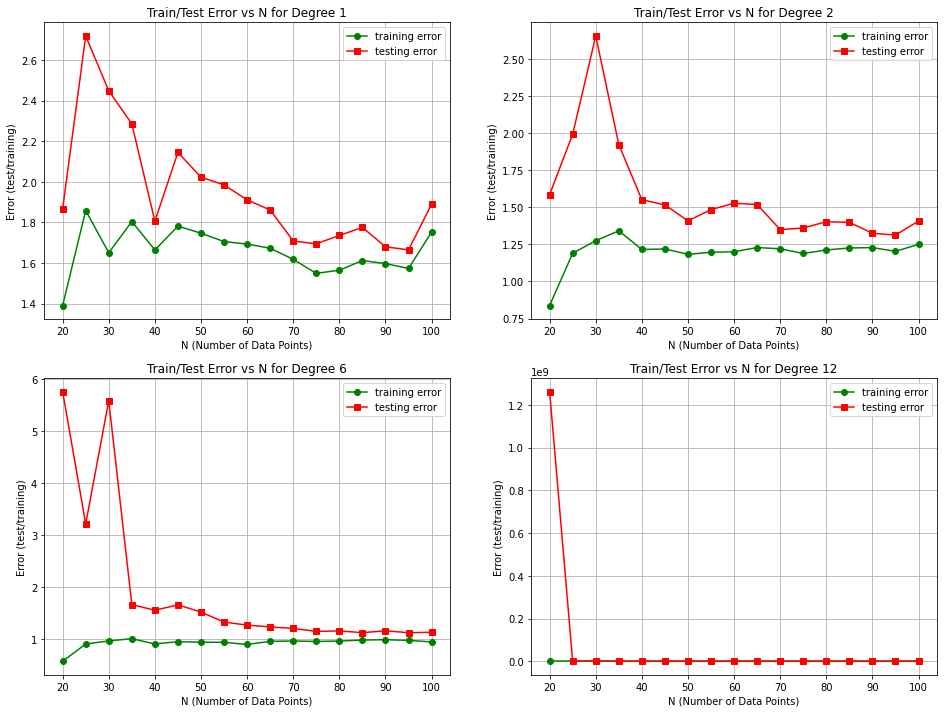

In [27]:
# plotting 

degrees = sorted(set(d for _, d in results_dict.keys()))

plt.figure(figsize=(16,12))

for i, degree in enumerate(degrees, 1):
    plt.subplot(2,2,i)
    
    Ns = sorted(set(N for N,d in results_dict.keys() if d == degree))
    train_errors = [results_dict[(N, degree)]["train_error"] for N in Ns]
    test_errors = [results_dict[(N, degree)]["test_error"] for N in Ns]
    
    plt.plot(Ns, train_errors, label = "training error", marker ='o', color = "green")
    plt.plot(Ns, test_errors, label = "testing error", marker = 's', color = "red")
    
    plt.xlabel("N (Number of Data Points)")
    plt.ylabel("Error (test/training)")
#     plt.yscale("log") #used this to examine the 12 degree polynomial more sensibly
    plt.title(f"Train/Test Error vs N for Degree {degree}")
    plt.legend()
    plt.grid()

## Problem D

High bias means the model is underfitting, so the training error will remain considerable even with more datapoints, but will decrease with adding compelxity to the model (i.e. a higher degree polynomial fit). I Would say the polynomial of degree 1 and 2 both underfit, but 1 seems slightly worse off, since it seems to further increase towards the most datapoints. 

## Problem E

High variance means the model is overfitting. The polynomial of degree 12 seems to have the highest variance initially since the training error is much smaller than the test error. This signals that the model is good at predicting the training data, but is bad at predicting new data that it hasn't trained on. Polynomial of order 6 also suffers from this problem and is easier to see, since the first testing error for the 12 degree polynomial is an order of 9 larger than the rest.

## Problem F

The curve seems to stabilise at some point, so adding even more data points will not improve the model's predictions. Since the errors are still large as they stabilise, this is indicative of the fact that more complexity is needed to reduce them, i.e. we could reduce the bias.

## Problem G

This seems to be in contradiction with what was discussed during Friday's lecture (08.02). Based on the last pollev question we discussed the fact that in geenral the validation error would be smaller than the training error, because it is obtained with the updated weights of the model (after an epoch of learning has happened), such that it would generally be somewhat better than the learning error (computed at the begining of the epoch). Perhaps I do not remember correctly. This seems somewhat counter-intuitive though, since the training data is, after all, data that the model has "seen" and is "familiar" with, and new data could have some deviation from that.

## Problem H

I think either 6 or 12 degree polynomials will perform quite well, as long as they had "enough" data to train on, from 35 datapoints and up, they seem to have similar errors. 

# 4) Stochastic Gradient Descent (A-J)

## Problem A

$f (x_1, x_2,..., x_d) = \mathbf{w}^T\mathbf{x}$ where $\mathbf{w}^T = (b, w_1, w_2, ..., w_d)$ and $\mathbf{x} = (1, x_1, x_2, ..., x_d)$ such that the inner product introduces the additional b factor for biasing

## Problem B

The gradient of the loss function with respect to the weight factors $\mathbf{w}$ is:


$\nabla_\mathbf{w} L(f) = \frac{\partial}{\partial \mathbf{w}} \sum^{N}_{i=1} (y_i - \mathbf{w}^T \mathbf{x}_i) = 2\sum^{N}_{i=1} \mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i - y_i)$

## Problem C (no bias)

In [53]:
def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
        bias: default is 0

    Outputs:
        The loss evaluated with respect to X, Y, and w. (scalar)
    """
    
    predicted = X@w  # ie dot product
    errors = Y - predicted
    
    loss = np.sum(errors**2)

    return loss

In [71]:
def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w. (D, ) shaped numpy array containing the gradient at 
            with respect to w datapoint (x, y)
    """
    
    error = (y - np.dot(w,x))
    grad = (-2) * x * error

    
    return grad

In [72]:
def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: learning rate.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """
    
    #we want to store weights and losses at each epoch so we can initialise based on the size of X
    N, D = X.shape # N is how many datapoints and D is features of each
    
    W = np.zeros((N_epochs, D)) # (epochs, D) 0 array to store the D-dimensional weight factor vector at epochs
    losses = np.zeros(N_epochs) # 0 array for loss at each epoch
    
    w = w_start.copy()
    
    for epoch in range(N_epochs):
        
        # recommended shuffling 
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        #compute the gradient at each data point by iterating over shuffled X, Y values
        for i in range(N):
            x_i = X_shuffled[i]
            y_i = Y_shuffled[i]
        
            grad = gradient(x_i, y_i, w)
            
            # weight is updated by removing the gradient at datapoint times the learning reate
            
            w -= eta * grad
            
        W[epoch] = w
        losses[epoch] = loss(X, Y, w)
        
    return W, losses

## Problem D

copy-pasted from [JMDuarte](https://github.com/jmduarte/phys139_239/blob/main/homeworks/homework_2/code/1_notebook_part1.ipynb)

### Answer:

Based on the obtained animations, I do not really see a difference between the two datasets. The loss functions are very similar in shape, so for both I observed that having a starting point at which the absolute value of the gradient is larger will correspond to a larger nudge in the opposite direction (in the direction of the descent).

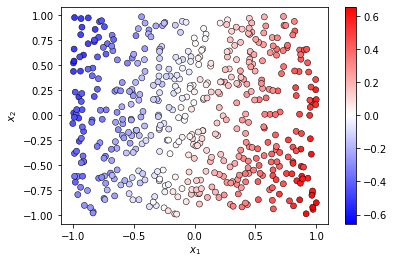

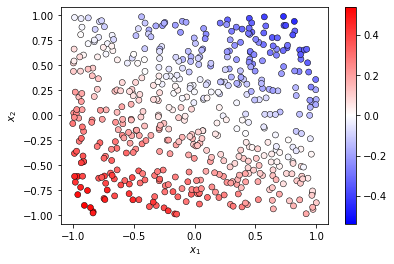

(<Figure size 432x288 with 2 Axes>, <Axes: xlabel='$x_1$', ylabel='$x_2$'>)

In [7]:
# generate the dataset as per @JMDuarte's notebook

X1, Y1 = generate_dataset1()
plot_dataset(X1, Y1)
X2, Y2 = generate_dataset2()
plot_dataset(X2, Y2)

### Dataset 1, single sarting point

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1e-05} ...


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


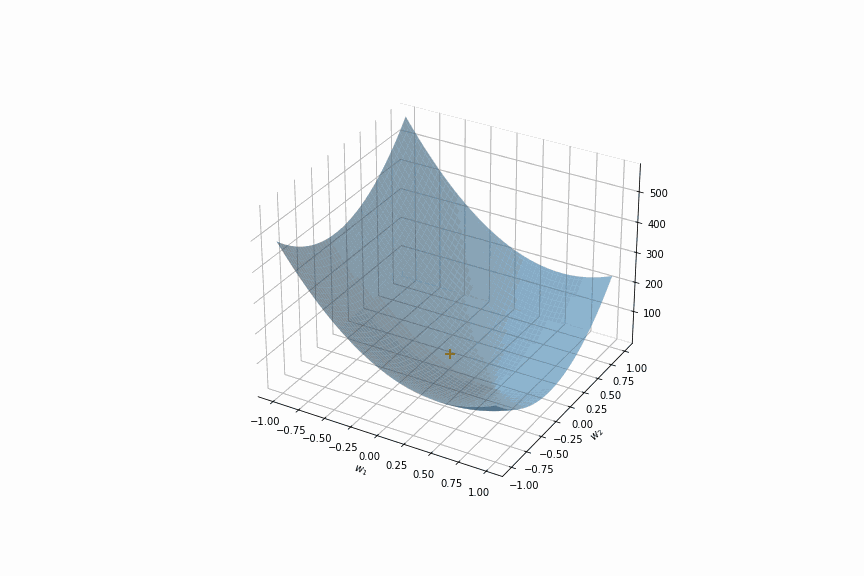

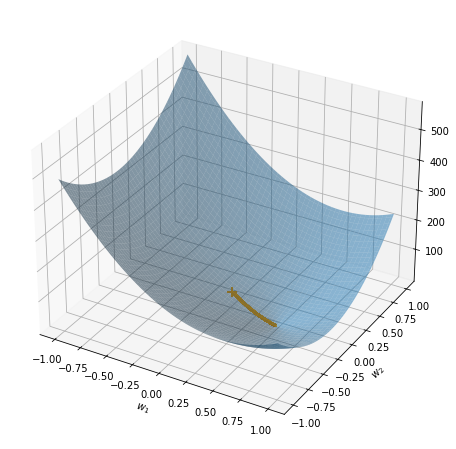

In [58]:
# Parameters to feed the SGD.
# <FR> changes the animation speed.
params = ({"w_start": [0.01, 0.01], "eta": 0.00001},)
N_epochs = 1000
FR = 20

# Let's animate it!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save("animation1.gif", fps=30, writer="imagemagick")
Image(open("animation1.gif", "rb").read())


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


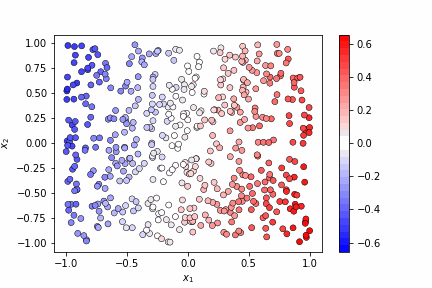

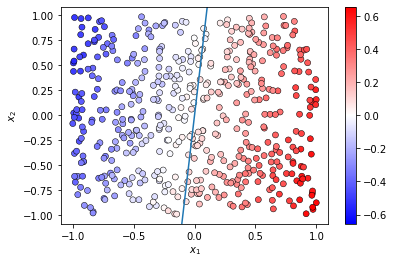

In [12]:
# Parameters to feed the SGD.
params = ({"w_start": [0.01, 0.01], "eta": 0.00001},)
N_epochs = 1000
FR = 20

# Let's do it!
W, _ = SGD(X1, Y1, params[0]["w_start"], params[0]["eta"], N_epochs)
anim = animate_convergence(X1, Y1, W, FR)
anim.save("animation2.gif", fps=30, writer="imagemagick")
Image(open("animation2.gif", "rb").read())

### Dataset 1, multiple starting points

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


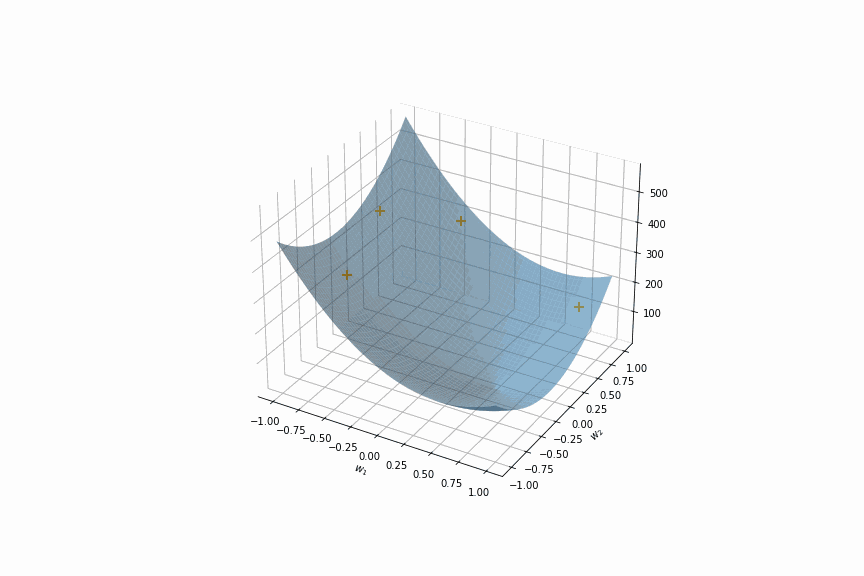

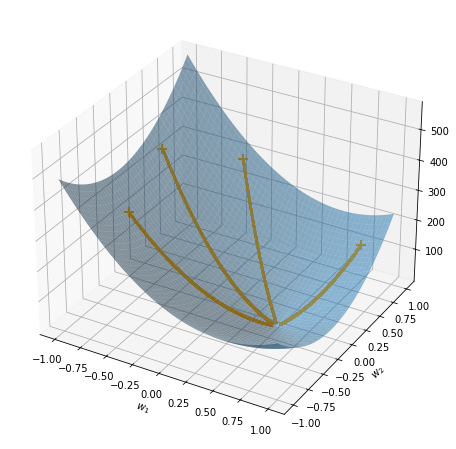

In [13]:
# Parameters to feed the SGD.
# Here, we specify each different set of initializations as a dictionary.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Let's go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR)
anim.save("animation3.gif", fps=30, writer="imagemagick")
Image(open("animation3.gif", "rb").read())

### Datsaset 2, multiple starting points

Performing SGD with parameters {'w_start': [-0.8, -0.3], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.9, 0.4], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [-0.4, 0.9], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.8, 0.8], 'eta': 1e-05} ...


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


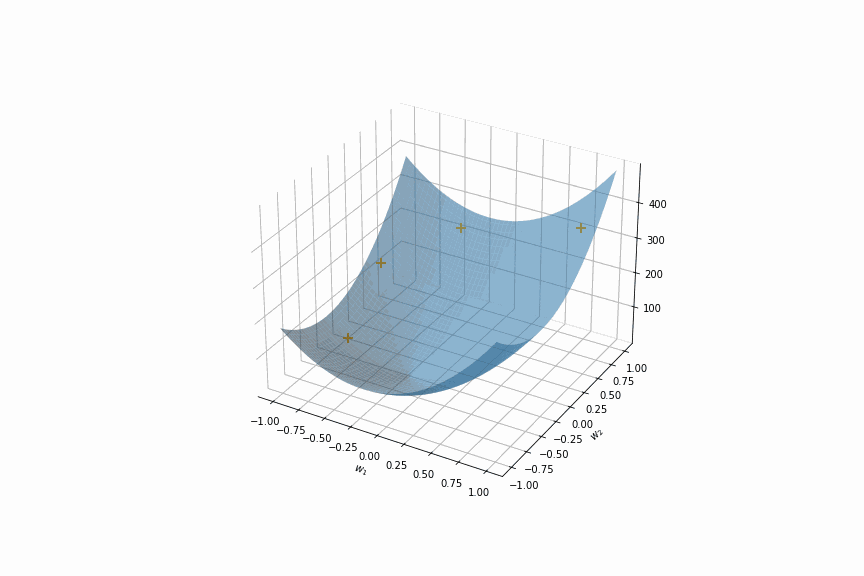

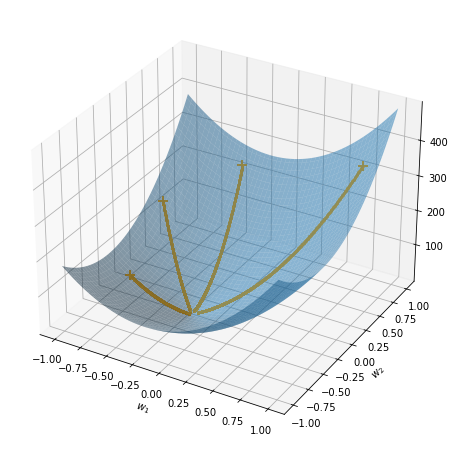

In [14]:
# Parameters to feed the SGD.
params = (
    {"w_start": [-0.8, -0.3], "eta": 0.00001},
    {"w_start": [-0.9, 0.4], "eta": 0.00001},
    {"w_start": [-0.4, 0.9], "eta": 0.00001},
    {"w_start": [0.8, 0.8], "eta": 0.00001},
)
N_epochs = 1000
FR = 20

# Animate!
anim = animate_sgd_suite(SGD, loss, X2, Y2, params, N_epochs, FR)
anim.save("animation4.gif", fps=30, writer="imagemagick")
Image(open("animation4.gif", "rb").read())


## Problem E

Performing SGD with parameters {'w_start': [0.7, 0.8], 'eta': 1e-05} ...
Performing SGD with parameters {'w_start': [0.2, 0.8], 'eta': 5e-05} ...
Performing SGD with parameters {'w_start': [-0.2, 0.7], 'eta': 0.0001} ...
Performing SGD with parameters {'w_start': [-0.6, 0.6], 'eta': 0.0002} ...


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


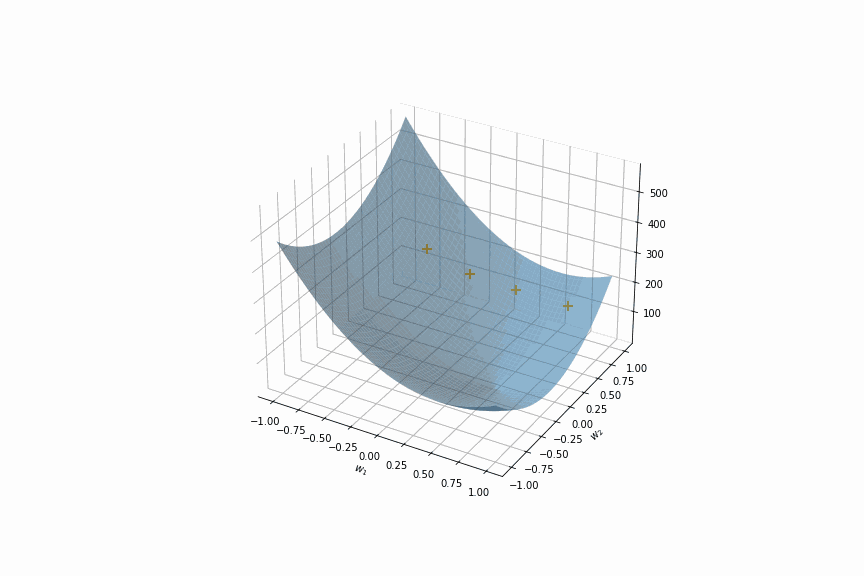

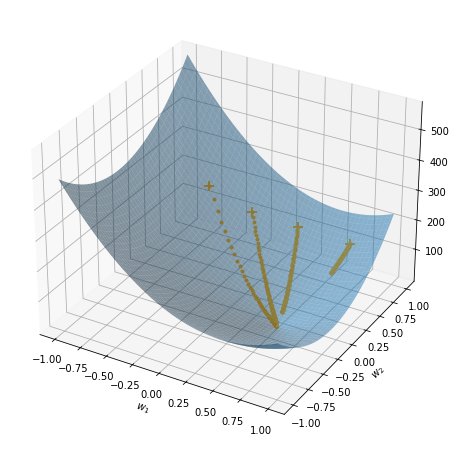

In [15]:
# Parameters to feed the SGD.
params = (
    {"w_start": [0.7, 0.8], "eta": 0.00001},
    {"w_start": [0.2, 0.8], "eta": 0.00005},
    {"w_start": [-0.2, 0.7], "eta": 0.0001},
    {"w_start": [-0.6, 0.6], "eta": 0.0002},
)
N_epochs = 100
FR = 2

# Go!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation5.gif", fps=30, writer="imagemagick")
Image(open("animation5.gif", "rb").read())

### Different way to visualise

Clearly with larger $\eta$ values, the loss decreases faster, as we are nudged a further distance at every step such that we are able to reach the minimum of the loss function faster. Choosing it of order 1 (or too big) is unwise because the nudges may be so big that the minimum would never be able to be reached by such a big stepsize (can be clearly seen in animation6). 

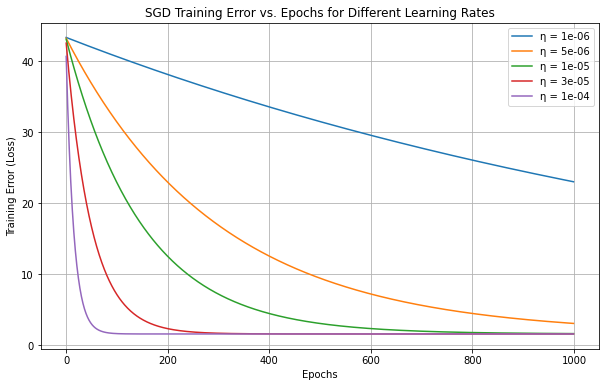

In [16]:
eta_vals = [1e-6, 5e-6, 1e-5, 3e-5, 1e-4]
w_start = [0.01, 0.01]
N_epochs = 1000

plt.figure(figsize=(10, 6))

for eta in eta_vals:
    _, losses = SGD(X1, Y1, w_start, eta, N_epochs)
    plt.plot(range(N_epochs), losses, label = f'η = {eta:.0e}')
    
plt.xlabel('Epochs')
plt.ylabel('Training Error (Loss)')
plt.title('SGD Training Error vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

Performing SGD with parameters {'w_start': [0.01, 0.01], 'eta': 1} ...


MovieWriter imagemagick unavailable; using Pillow instead.



Animating...


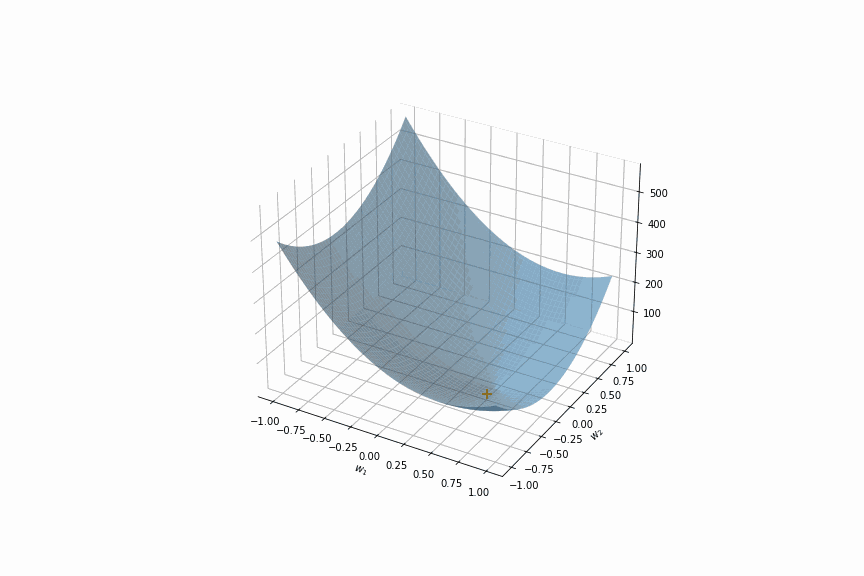

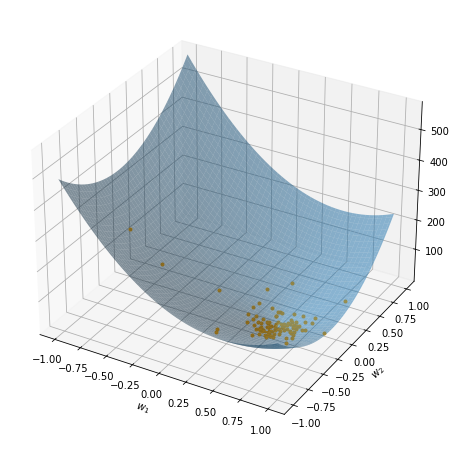

In [17]:
# Parameters to feed the SGD.
params = ({"w_start": [0.01, 0.01], "eta": 1},)
N_epochs = 100
FR = 2

# Voila!
anim = animate_sgd_suite(SGD, loss, X1, Y1, params, N_epochs, FR, ms=2)
anim.save("animation6.gif", fps=30, writer="imagemagick")
Image(open("animation6.gif", "rb").read())

In [18]:
# Parameters to feed the SGD.
w_start = [0.01, 0.01]
eta = 10
N_epochs = 100

# Presto!
W, losses = SGD(X1, Y1, w_start, eta, N_epochs)

# pizza pizza presto presto but Python is not having a good time with this one

## Problem F
getting serious now, we're atlking BIG data AND bias

In [19]:
%matplotlib inline

In [77]:
### MR Duarte uses a new function for SGD that returns the final weight vector so I will just redefine
### it as a new function here
def SGD_bias_final_weight(X, Y, w_start, eta, N_epochs, bias=0.001):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: learning rate.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """
    w_start = np.concatenate([np.array([bias]), w_start])
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    
    #we want to store weights and losses at each epoch so we can initialise based on the size of X
    N, D = X.shape # N is how many datapoints and D is features of each
    
    W = np.zeros((N_epochs, D)) # (epochs, D) 0 array to store the D-dimensional weight factor vector at epochs
    losses = np.zeros(N_epochs) # 0 array for loss at each epoch
    
    w = w_start.copy()
    
    for epoch in range(N_epochs):
        
        # recommended shuffling 
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        #compute the gradient at each data point by iterating over shuffled X, Y values
        for i in range(N):
            x_i = X_shuffled[i]
            y_i = Y_shuffled[i]
        
            grad = gradient(x_i, y_i, w)
            
            # weight is updated by removing the gradient at datapoint times the learning reate
            
            w -= eta * grad
            
        losses[epoch] = loss(X, Y, w)
        
    return w, losses

In [60]:
dataE = load_data("data/sgd_data.csv")
X_sgd = dataE[:,:4]
Y_sgd = dataE[:, 4]

In [61]:
# params
w_start_sgd = [0.001, 0.001, 0.001, 0.001]
N_epochs_sgd = 800
eta_sgd = np.exp(-15)

In [79]:
w, _, = SGD_bias_final_weight(X_sgd, Y_sgd, w_start_sgd, eta_sgd, N_epochs_sgd, bias=0.001)

# weights :  -0.22717955,  -5.94208926,   3.94392317, -11.72381753, 8.78570477

## Problem G

It looks like the really small learning rates take a longer time to learn. This i to be expected since it corresponds to smaller nudges. 

In [83]:
etas = [np.exp(-10), np.exp(-11), np.exp(-12), np.exp(-13), np.exp(-14), np.exp(-15)]

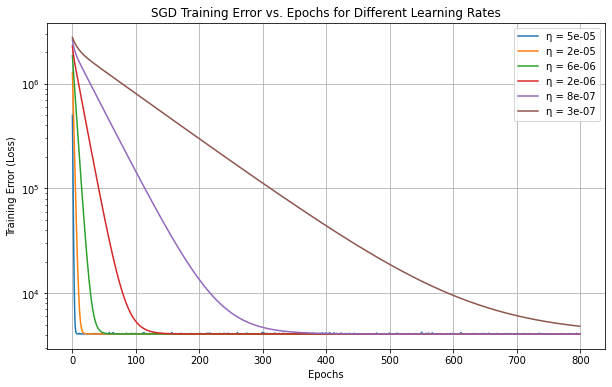

In [85]:
plt.figure(figsize=(10, 6))

for eta in etas:
    _, losses = SGD_bias_final_weight(X_sgd, Y_sgd, w_start_sgd, eta, N_epochs_sgd, bias=0.001)
    plt.plot(range(N_epochs_sgd), losses, label = f'η = {eta:.0e}')
    
plt.xlabel('Epochs')
plt.ylabel('Training Error (Loss)')
plt.yscale("log")
plt.title('SGD Training Error vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)

## Problem H


In [89]:
def cf_weights(X, Y):
    """
    Find the weight vector w using the closed form solution for linear regression with least squares.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    
    """
    
    weights = np.linalg.inv(X.T@X) @ (X.T @ Y)
    
    return weights
    

# weights (cf) : -6.00714404   4.00035947 -11.94691938   8.97655242

## Problem I
I guess the most important is that the operations involved in computing the weights with the closed-form solution can become very computationally heavy once we work wiht a lot of datapoints. We are also taking an inverse for the closed form sultion, so that might give a lot of errors if we divide by large numbers (floating point error)

## Problem J
I think the most minimal update in sophitication could come out of having the learning stop when the loss function is within a desirable range for "enough" epochs (since it could oscillate). 